In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import time
import os
from sys import platform
from matplotlib import rc
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import itertools


import matplotlib.pyplot as plt


%matplotlib inline

In [2]:
# if platform == 'linux' or platform == 'linux2':
#     home = '/lab_data/coaxlab/Projects/dynamic_decision_policy_reconfiguration/'
# elif platform == 'darwin': 
#     home = '/Users/i_67981492/dynamic_decision_policy_reconfiguration/'
    
# print(platform, home)

home = os.path.expanduser('~')

In [3]:
write_dir = os.path.join(home, 'Documents/elife_revisions_loki/manifold_estimation_redeux/'); print(write_dir)

fig_path = os.path.join(write_dir, 'updated_figs/'); print(fig_path)

/Users/i_67981492/Documents/elife_revisions_loki/manifold_estimation_redeux/
/Users/i_67981492/Documents/elife_revisions_loki/manifold_estimation_redeux/updated_figs/


In [4]:
av_polar_est_df = pd.read_csv(os.path.join(write_dir, 'loki0_av_polar_est_df.csv'))

In [5]:
av_polar_est_df.head()

,mcmc_iteration,shifted_epoch_trial,v,v_est_z,a,a_est_z,r_z,theta_radians_z,theta_deg_z
0,0,-1,1.165847,1.523414,0.799337,-0.439473,NaN,NaN,NaN
1,0,0,-0.826085,-1.238133,0.830902,1.568585,3.414445,-0.942081,-53.977241
2,0,1,-0.533549,-0.832571,0.805968,-0.017621,1.637233,2.891275,165.657838
3,0,2,0.149891,0.114927,0.791887,-0.913459,1.303947,2.328177,133.394696
4,0,3,0.603051,0.743173,0.801742,-0.286517,0.887553,0.786437,45.059545


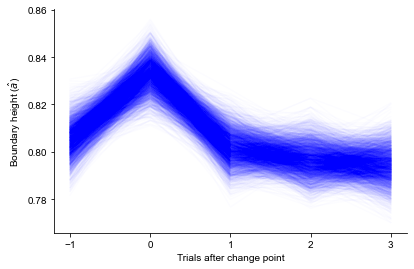

In [6]:
plt.figure()

for it in av_polar_est_df.mcmc_iteration.unique():
    
    dat = av_polar_est_df.loc[av_polar_est_df.mcmc_iteration == it].copy().reset_index(drop=True)
    
    g = sns.lineplot(x="shifted_epoch_trial", y="a", data=dat, color='blue', alpha=0.01)
    
sns.despine()
sns.set(style='whitegrid', font_scale=1.25) 
plt.ylabel(r'Boundary height ($\hat{a}$)'); plt.xlabel('Trials after change point')
plt.tight_layout()

plt.savefig(os.path.join(home, fig_path, 'loki0_evoked_a_mcmc.png'))
plt.savefig(os.path.join(home, fig_path, 'loki0_evoked_a_mcmc.pdf'))

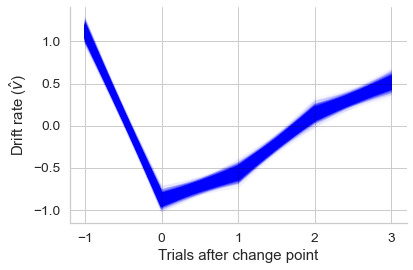

In [7]:
plt.figure()

for it in av_polar_est_df.mcmc_iteration.unique():
    
    dat = av_polar_est_df.loc[av_polar_est_df.mcmc_iteration == it].copy().reset_index(drop=True)
    
    g = sns.lineplot(x="shifted_epoch_trial", y="v", data=dat, color='blue', alpha=0.01)
    
sns.despine()
sns.set(style='whitegrid', font_scale=1.25) 
plt.ylabel(r'Drift rate ($\hat{v}$)'); plt.xlabel('Trials after change point')
plt.tight_layout()

plt.savefig(os.path.join(home, fig_path, 'loki0_evoked_v_mcmc.png'))
plt.savefig(os.path.join(home, fig_path, 'loki0_evoked_v_mcmc.pdf'))

In [8]:
def plot_a_v_time(data, fig, ax, fig_path=write_dir, conditional=False, savefig=None,
all_subs=False, linestyle='-', legend=True,
pooled_mean=False, id_str=None, home=os.path.expanduser('~')):


    # hack to get hue to work with lineplots and markers ...

    n_plotted_trials = data.shifted_epoch_trial.nunique()

    palette_seed = sns.color_palette('Greens', n_colors=200)[80::10]

    assert len(palette_seed) >= n_plotted_trials, 'check n_colors for color palette'

    palette = itertools.cycle(palette_seed)

    sns.lineplot(data=data, x='a_est_z', y='v_est_z', hue='shifted_epoch_trial', palette=palette_seed[:n_plotted_trials], marker='o');

    x = data.a_est_z
    y = data.v_est_z

    for i in range(len(data)):
        plt.plot(x.values[i:i+2], y.values[i:i+2], color=next(palette), linestyle=linestyle, linewidth=2.5)

    if conditional is True:
        plt.title('subject ' + str(int(data.subj_id.unique()[0])) + ': ' +
                '$\lambda =$ ' + str(int(data.lambda_val.unique()[0])) + ' p = ' + str(data.p_optimal.unique()[0]), fontsize=20)
        fig_name = (id_str + str(int(data.subj_id.unique()[0])) + '_' + str(int(data.condition.unique()[0])) +'_a_v_time_color.png')
    if all_subs is True:
        fig_name = (id_str + 'all_conditions_all_subs_a_v_time_color.png')
    if pooled_mean is True:
        fig_name = (id_str + 'mean_a_v_time_color.png')

    plt.xlabel(r'Boundary height ($\hat{a}$)')
    plt.ylabel(r'Drift rate ($\hat{v}$)')

    if legend:
        legend = ax.legend()
        legend.texts[0].set_text("epoch trial")
    else:
        ax.get_legend().remove()


    if savefig:

        plt.savefig(os.path.join(fig_path, fig_name))


    return fig, ax

In [9]:
av_polar_est_df.loc[av_polar_est_df.shifted_epoch_trial == -1].r_z.unique() # np.nan should be the case because of differencing

array([nan])

In [10]:
mean_av_df = av_polar_est_df.groupby(['shifted_epoch_trial'])[['a_est_z', 'v_est_z']].mean().reset_index() # only plot t-1-3

mean_av_df.head()

,shifted_epoch_trial,a_est_z,v_est_z
0,-1,-0.070208,1.457648
1,0,1.721901,-1.305874
2,1,-0.285021,-0.868974
3,2,-0.611965,0.102416
4,3,-0.754706,0.614784


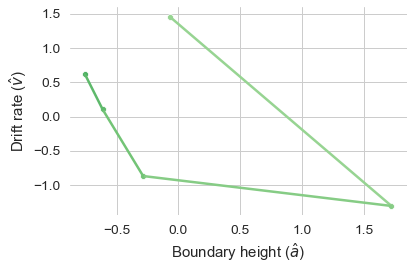

In [11]:
fig, ax = plt.subplots()

plot_a_v_time(mean_av_df, fig, ax, conditional=False, savefig=False,
all_subs=True, pooled_mean=True, legend=False, id_str='loki_0_')

sns.despine(left=True, bottom=True)
plt.tight_layout()

plt.savefig(os.path.join(home, fig_path, 'loki0_evoked_manifold.png'))
plt.savefig(os.path.join(home, fig_path, 'loki0_evoked_manifold.pdf'))